### Coursera Applied Data Science Capstone - Weeks 4 & 5 - Analyze Chicago Communities to Open Boutique Donut Shop

This first section will install & import initial libraries and programs used in this Notebook 

In [66]:
import numpy as np # library to handle data in a vectorized manner

In [67]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [68]:
import json # library to handle JSON files

In [69]:
!pip install geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
print('imported.')


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --yes
imported.


In [70]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [71]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [72]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [73]:
!pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('imported.')

imported.


This next section will read the Wikipedia page containing the Chicago communiities, pull it into a dataframe, and clean the table

In [74]:
df=pd.read_html("https://en.wikipedia.org/wiki/Community_areas_in_Chicago")[0]

In [75]:
df

,Number[8],Name[8],2017[9],Area (sq mi.)[10],Area (km2),2017density (/sq mi.),2017density (/km2)
0,01,Rogers Park,55062,1.84,4.77,29925.00,11554.11
1,02,West Ridge,76215,3.53,9.14,21590.65,8336.20
2,03,Uptown,57973,2.32,6.01,24988.36,9648.06
3,04,Lincoln Square,41715,2.56,6.63,16294.92,6291.50
4,05,North Center,35789,2.05,5.31,17458.05,6740.59
5,06,Lake View,100470,3.12,8.08,32201.92,12433.23
6,07,Lincoln Park,67710,3.16,8.18,21427.22,8273.10
7,08,Near North Side,88893,2.74,7.10,32442.70,12526.20
8,09,Edison Park,11605,1.13,2.93,4235.40,1635.30
9,10,Norwood Park,37089,4.37,11.32,8487.19,3276.92


In looking at the initial dataframe, I see I can delete the "Number[8]" column since it contains the same valus as the index column. I can also delete the "Area (km2)" and "2017density (/km2)" columns since comparable columns based on square miles are also provided which is more predominently used in the United States. 

In [76]:
chi = df.drop('Number[8]', 1)
chi

,Name[8],2017[9],Area (sq mi.)[10],Area (km2),2017density (/sq mi.),2017density (/km2)
0,Rogers Park,55062,1.84,4.77,29925.00,11554.11
1,West Ridge,76215,3.53,9.14,21590.65,8336.20
2,Uptown,57973,2.32,6.01,24988.36,9648.06
3,Lincoln Square,41715,2.56,6.63,16294.92,6291.50
4,North Center,35789,2.05,5.31,17458.05,6740.59
5,Lake View,100470,3.12,8.08,32201.92,12433.23
6,Lincoln Park,67710,3.16,8.18,21427.22,8273.10
7,Near North Side,88893,2.74,7.10,32442.70,12526.20
8,Edison Park,11605,1.13,2.93,4235.40,1635.30
9,Norwood Park,37089,4.37,11.32,8487.19,3276.92


In [77]:
chi = chi.drop ('Area (km2)', 1)
chi

,Name[8],2017[9],Area (sq mi.)[10],2017density (/sq mi.),2017density (/km2)
0,Rogers Park,55062,1.84,29925.00,11554.11
1,West Ridge,76215,3.53,21590.65,8336.20
2,Uptown,57973,2.32,24988.36,9648.06
3,Lincoln Square,41715,2.56,16294.92,6291.50
4,North Center,35789,2.05,17458.05,6740.59
5,Lake View,100470,3.12,32201.92,12433.23
6,Lincoln Park,67710,3.16,21427.22,8273.10
7,Near North Side,88893,2.74,32442.70,12526.20
8,Edison Park,11605,1.13,4235.40,1635.30
9,Norwood Park,37089,4.37,8487.19,3276.92


In [78]:
chi = chi.drop('2017density (/km2)', 1)
chi

,Name[8],2017[9],Area (sq mi.)[10],2017density (/sq mi.)
0,Rogers Park,55062,1.84,29925.00
1,West Ridge,76215,3.53,21590.65
2,Uptown,57973,2.32,24988.36
3,Lincoln Square,41715,2.56,16294.92
4,North Center,35789,2.05,17458.05
5,Lake View,100470,3.12,32201.92
6,Lincoln Park,67710,3.16,21427.22
7,Near North Side,88893,2.74,32442.70
8,Edison Park,11605,1.13,4235.40
9,Norwood Park,37089,4.37,8487.19


Next, I will update the column names to something more useful

In [79]:
chi_clean1 = chi.rename(columns={"Name[8]": "Community", "2017[9]": "2017 Population", "Area (sq mi.)[10]": "Area (sq mi)", "2017density (/sq mi.)": "2017 Population Density (/sq mi)"})
chi_clean1   

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi)
0,Rogers Park,55062,1.84,29925.00
1,West Ridge,76215,3.53,21590.65
2,Uptown,57973,2.32,24988.36
3,Lincoln Square,41715,2.56,16294.92
4,North Center,35789,2.05,17458.05
5,Lake View,100470,3.12,32201.92
6,Lincoln Park,67710,3.16,21427.22
7,Near North Side,88893,2.74,32442.70
8,Edison Park,11605,1.13,4235.40
9,Norwood Park,37089,4.37,8487.19


In [80]:
chi_clean1.shape

(78, 4)

I initially saw on Wikipedia that there were 77 communities but when I ran the .shape function it produced 78 rows. I now realize the 78th row is a total row which is not necessary and will be deleted: 

In [81]:
chi_clean1 = chi_clean1.drop([77])
chi_clean1

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi)
0,Rogers Park,55062,1.84,29925.00
1,West Ridge,76215,3.53,21590.65
2,Uptown,57973,2.32,24988.36
3,Lincoln Square,41715,2.56,16294.92
4,North Center,35789,2.05,17458.05
5,Lake View,100470,3.12,32201.92
6,Lincoln Park,67710,3.16,21427.22
7,Near North Side,88893,2.74,32442.70
8,Edison Park,11605,1.13,4235.40
9,Norwood Park,37089,4.37,8487.19


I've already learned that when I run these Communities through geopy, the results for many communities will be from cities outside Chicago

In [82]:
chi_clean1['Community'] = chi_clean1['Community'].astype(str) + ', Chicago'
chi_clean1

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi)
0,"Rogers Park, Chicago",55062,1.84,29925.00
1,"West Ridge, Chicago",76215,3.53,21590.65
2,"Uptown, Chicago",57973,2.32,24988.36
3,"Lincoln Square, Chicago",41715,2.56,16294.92
4,"North Center, Chicago",35789,2.05,17458.05
5,"Lake View, Chicago",100470,3.12,32201.92
6,"Lincoln Park, Chicago",67710,3.16,21427.22
7,"Near North Side, Chicago",88893,2.74,32442.70
8,"Edison Park, Chicago",11605,1.13,4235.40
9,"Norwood Park, Chicago",37089,4.37,8487.19


### *Now that we have a clean Chicago Community dataframe, in this next section I will pull in latitude & longitude coordinates*

In [85]:
chi_coord = chi_clean1.copy()
chi_coord

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi)
0,"Rogers Park, Chicago",55062,1.84,29925.00
1,"West Ridge, Chicago",76215,3.53,21590.65
2,"Uptown, Chicago",57973,2.32,24988.36
3,"Lincoln Square, Chicago",41715,2.56,16294.92
4,"North Center, Chicago",35789,2.05,17458.05
5,"Lake View, Chicago",100470,3.12,32201.92
6,"Lincoln Park, Chicago",67710,3.16,21427.22
7,"Near North Side, Chicago",88893,2.74,32442.70
8,"Edison Park, Chicago",11605,1.13,4235.40
9,"Norwood Park, Chicago",37089,4.37,8487.19


In [86]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="foursquare_agent")
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
chi_coord['location'] = chi_coord['Community'].apply(geocode)
chi_coord['point'] = chi_coord['location'].apply(lambda loc: tuple(loc.point) if loc else None)
chi_coord

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi),location,point
0,"Rogers Park, Chicago",55062,1.84,29925.00,"(Rogers Park, Chicago, Cook County, Illinois, ...","(42.01053135, -87.67074819664808, 0.0)"
1,"West Ridge, Chicago",76215,3.53,21590.65,"(West Ridge, Chicago, Cook County, Illinois, 6...","(42.0035482, -87.6962426, 0.0)"
2,"Uptown, Chicago",57973,2.32,24988.36,"(Uptown, Chicago, Cook County, Illinois, 60640...","(41.9666299, -87.6555458, 0.0)"
3,"Lincoln Square, Chicago",41715,2.56,16294.92,"(Lincoln Square, Chicago, Cook County, Illinoi...","(41.975989850000005, -87.6896163305115, 0.0)"
4,"North Center, Chicago",35789,2.05,17458.05,"(North Center, Chicago, Cook County, Illinois,...","(41.9561073, -87.6791596, 0.0)"
5,"Lake View, Chicago",100470,3.12,32201.92,"(Lake View, Chicago, Cook County, Illinois, Un...","(41.947050000000004, -87.65542878290054, 0.0)"
6,"Lincoln Park, Chicago",67710,3.16,21427.22,"(Lincoln Park, Boystown, Lake View, Chicago, C...","(41.940297650000005, -87.63811710541756, 0.0)"
7,"Near North Side, Chicago",88893,2.74,32442.70,"(Near North Side, Chicago, Cook County, Illino...","(41.9000327, -87.6344975, 0.0)"
8,"Edison Park, Chicago",11605,1.13,4235.40,"(Edison Park, Chicago, Cook County, Illinois, ...","(42.0057335, -87.81401633833357, 0.0)"
9,"Norwood Park, Chicago",37089,4.37,8487.19,"(Norwood Park, Chicago, Cook County, Illinois,...","(41.9855895, -87.80058173001102, 0.0)"


In [87]:
#Let's create a copy at this point since every time I want to go back and make changes it takes 3 minutes to run the geopy

chi_coord1 = chi_coord.copy()
chi_coord1


,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi),location,point
0,"Rogers Park, Chicago",55062,1.84,29925.00,"(Rogers Park, Chicago, Cook County, Illinois, ...","(42.01053135, -87.67074819664808, 0.0)"
1,"West Ridge, Chicago",76215,3.53,21590.65,"(West Ridge, Chicago, Cook County, Illinois, 6...","(42.0035482, -87.6962426, 0.0)"
2,"Uptown, Chicago",57973,2.32,24988.36,"(Uptown, Chicago, Cook County, Illinois, 60640...","(41.9666299, -87.6555458, 0.0)"
3,"Lincoln Square, Chicago",41715,2.56,16294.92,"(Lincoln Square, Chicago, Cook County, Illinoi...","(41.975989850000005, -87.6896163305115, 0.0)"
4,"North Center, Chicago",35789,2.05,17458.05,"(North Center, Chicago, Cook County, Illinois,...","(41.9561073, -87.6791596, 0.0)"
5,"Lake View, Chicago",100470,3.12,32201.92,"(Lake View, Chicago, Cook County, Illinois, Un...","(41.947050000000004, -87.65542878290054, 0.0)"
6,"Lincoln Park, Chicago",67710,3.16,21427.22,"(Lincoln Park, Boystown, Lake View, Chicago, C...","(41.940297650000005, -87.63811710541756, 0.0)"
7,"Near North Side, Chicago",88893,2.74,32442.70,"(Near North Side, Chicago, Cook County, Illino...","(41.9000327, -87.6344975, 0.0)"
8,"Edison Park, Chicago",11605,1.13,4235.40,"(Edison Park, Chicago, Cook County, Illinois, ...","(42.0057335, -87.81401633833357, 0.0)"
9,"Norwood Park, Chicago",37089,4.37,8487.19,"(Norwood Park, Chicago, Cook County, Illinois,...","(41.9855895, -87.80058173001102, 0.0)"


In [88]:
#Let's remove row#31 "(The)Loop[11], Chicago" since it did not produce coordinates
chi_coord1 = chi_coord1.drop([31])
chi_coord1


,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi),location,point
0,"Rogers Park, Chicago",55062,1.84,29925.00,"(Rogers Park, Chicago, Cook County, Illinois, ...","(42.01053135, -87.67074819664808, 0.0)"
1,"West Ridge, Chicago",76215,3.53,21590.65,"(West Ridge, Chicago, Cook County, Illinois, 6...","(42.0035482, -87.6962426, 0.0)"
2,"Uptown, Chicago",57973,2.32,24988.36,"(Uptown, Chicago, Cook County, Illinois, 60640...","(41.9666299, -87.6555458, 0.0)"
3,"Lincoln Square, Chicago",41715,2.56,16294.92,"(Lincoln Square, Chicago, Cook County, Illinoi...","(41.975989850000005, -87.6896163305115, 0.0)"
4,"North Center, Chicago",35789,2.05,17458.05,"(North Center, Chicago, Cook County, Illinois,...","(41.9561073, -87.6791596, 0.0)"
5,"Lake View, Chicago",100470,3.12,32201.92,"(Lake View, Chicago, Cook County, Illinois, Un...","(41.947050000000004, -87.65542878290054, 0.0)"
6,"Lincoln Park, Chicago",67710,3.16,21427.22,"(Lincoln Park, Boystown, Lake View, Chicago, C...","(41.940297650000005, -87.63811710541756, 0.0)"
7,"Near North Side, Chicago",88893,2.74,32442.70,"(Near North Side, Chicago, Cook County, Illino...","(41.9000327, -87.6344975, 0.0)"
8,"Edison Park, Chicago",11605,1.13,4235.40,"(Edison Park, Chicago, Cook County, Illinois, ...","(42.0057335, -87.81401633833357, 0.0)"
9,"Norwood Park, Chicago",37089,4.37,8487.19,"(Norwood Park, Chicago, Cook County, Illinois,...","(41.9855895, -87.80058173001102, 0.0)"


In [89]:
#Now let's reindex since the indexing column is skipping the #31 we just removed:

chi_coord1 = chi_coord1.reset_index()
chi_coord1

,index,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi),location,point
0,0,"Rogers Park, Chicago",55062,1.84,29925.00,"(Rogers Park, Chicago, Cook County, Illinois, ...","(42.01053135, -87.67074819664808, 0.0)"
1,1,"West Ridge, Chicago",76215,3.53,21590.65,"(West Ridge, Chicago, Cook County, Illinois, 6...","(42.0035482, -87.6962426, 0.0)"
2,2,"Uptown, Chicago",57973,2.32,24988.36,"(Uptown, Chicago, Cook County, Illinois, 60640...","(41.9666299, -87.6555458, 0.0)"
3,3,"Lincoln Square, Chicago",41715,2.56,16294.92,"(Lincoln Square, Chicago, Cook County, Illinoi...","(41.975989850000005, -87.6896163305115, 0.0)"
4,4,"North Center, Chicago",35789,2.05,17458.05,"(North Center, Chicago, Cook County, Illinois,...","(41.9561073, -87.6791596, 0.0)"
5,5,"Lake View, Chicago",100470,3.12,32201.92,"(Lake View, Chicago, Cook County, Illinois, Un...","(41.947050000000004, -87.65542878290054, 0.0)"
6,6,"Lincoln Park, Chicago",67710,3.16,21427.22,"(Lincoln Park, Boystown, Lake View, Chicago, C...","(41.940297650000005, -87.63811710541756, 0.0)"
7,7,"Near North Side, Chicago",88893,2.74,32442.70,"(Near North Side, Chicago, Cook County, Illino...","(41.9000327, -87.6344975, 0.0)"
8,8,"Edison Park, Chicago",11605,1.13,4235.40,"(Edison Park, Chicago, Cook County, Illinois, ...","(42.0057335, -87.81401633833357, 0.0)"
9,9,"Norwood Park, Chicago",37089,4.37,8487.19,"(Norwood Park, Chicago, Cook County, Illinois,...","(41.9855895, -87.80058173001102, 0.0)"


In [90]:
#And now this produces an additional index column, so we must remove the old index column missing #31:

chi_coord1 = chi_coord1.drop('index', 1)

chi_coord1

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi),location,point
0,"Rogers Park, Chicago",55062,1.84,29925.00,"(Rogers Park, Chicago, Cook County, Illinois, ...","(42.01053135, -87.67074819664808, 0.0)"
1,"West Ridge, Chicago",76215,3.53,21590.65,"(West Ridge, Chicago, Cook County, Illinois, 6...","(42.0035482, -87.6962426, 0.0)"
2,"Uptown, Chicago",57973,2.32,24988.36,"(Uptown, Chicago, Cook County, Illinois, 60640...","(41.9666299, -87.6555458, 0.0)"
3,"Lincoln Square, Chicago",41715,2.56,16294.92,"(Lincoln Square, Chicago, Cook County, Illinoi...","(41.975989850000005, -87.6896163305115, 0.0)"
4,"North Center, Chicago",35789,2.05,17458.05,"(North Center, Chicago, Cook County, Illinois,...","(41.9561073, -87.6791596, 0.0)"
5,"Lake View, Chicago",100470,3.12,32201.92,"(Lake View, Chicago, Cook County, Illinois, Un...","(41.947050000000004, -87.65542878290054, 0.0)"
6,"Lincoln Park, Chicago",67710,3.16,21427.22,"(Lincoln Park, Boystown, Lake View, Chicago, C...","(41.940297650000005, -87.63811710541756, 0.0)"
7,"Near North Side, Chicago",88893,2.74,32442.70,"(Near North Side, Chicago, Cook County, Illino...","(41.9000327, -87.6344975, 0.0)"
8,"Edison Park, Chicago",11605,1.13,4235.40,"(Edison Park, Chicago, Cook County, Illinois, ...","(42.0057335, -87.81401633833357, 0.0)"
9,"Norwood Park, Chicago",37089,4.37,8487.19,"(Norwood Park, Chicago, Cook County, Illinois,...","(41.9855895, -87.80058173001102, 0.0)"


I spent 10+ hours trying to learn how to get geopy / Nominatim to add these location and point columns and I could not figure out how to just extract latitude & longitude from geopy so I decided to just extract the values directly from the df:

In [91]:
chi_coord1[['Latitude', 'Longitude', 'Height']] = pd.DataFrame(chi_coord1.point.tolist(), index=chi_coord1.index)
chi_coord1

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi),location,point,Latitude,Longitude,Height
0,"Rogers Park, Chicago",55062,1.84,29925.00,"(Rogers Park, Chicago, Cook County, Illinois, ...","(42.01053135, -87.67074819664808, 0.0)",42.010531,-87.670748,0.0
1,"West Ridge, Chicago",76215,3.53,21590.65,"(West Ridge, Chicago, Cook County, Illinois, 6...","(42.0035482, -87.6962426, 0.0)",42.003548,-87.696243,0.0
2,"Uptown, Chicago",57973,2.32,24988.36,"(Uptown, Chicago, Cook County, Illinois, 60640...","(41.9666299, -87.6555458, 0.0)",41.966630,-87.655546,0.0
3,"Lincoln Square, Chicago",41715,2.56,16294.92,"(Lincoln Square, Chicago, Cook County, Illinoi...","(41.975989850000005, -87.6896163305115, 0.0)",41.975990,-87.689616,0.0
4,"North Center, Chicago",35789,2.05,17458.05,"(North Center, Chicago, Cook County, Illinois,...","(41.9561073, -87.6791596, 0.0)",41.956107,-87.679160,0.0
5,"Lake View, Chicago",100470,3.12,32201.92,"(Lake View, Chicago, Cook County, Illinois, Un...","(41.947050000000004, -87.65542878290054, 0.0)",41.947050,-87.655429,0.0
6,"Lincoln Park, Chicago",67710,3.16,21427.22,"(Lincoln Park, Boystown, Lake View, Chicago, C...","(41.940297650000005, -87.63811710541756, 0.0)",41.940298,-87.638117,0.0
7,"Near North Side, Chicago",88893,2.74,32442.70,"(Near North Side, Chicago, Cook County, Illino...","(41.9000327, -87.6344975, 0.0)",41.900033,-87.634497,0.0
8,"Edison Park, Chicago",11605,1.13,4235.40,"(Edison Park, Chicago, Cook County, Illinois, ...","(42.0057335, -87.81401633833357, 0.0)",42.005733,-87.814016,0.0
9,"Norwood Park, Chicago",37089,4.37,8487.19,"(Norwood Park, Chicago, Cook County, Illinois,...","(41.9855895, -87.80058173001102, 0.0)",41.985590,-87.800582,0.0


Now that I have latitude & longitude in their own columns, I'll remove the other columns no longer needed:

In [92]:
chi_clean2 = chi_coord1.drop ('location', 1)
chi_clean2

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi),point,Latitude,Longitude,Height
0,"Rogers Park, Chicago",55062,1.84,29925.00,"(42.01053135, -87.67074819664808, 0.0)",42.010531,-87.670748,0.0
1,"West Ridge, Chicago",76215,3.53,21590.65,"(42.0035482, -87.6962426, 0.0)",42.003548,-87.696243,0.0
2,"Uptown, Chicago",57973,2.32,24988.36,"(41.9666299, -87.6555458, 0.0)",41.966630,-87.655546,0.0
3,"Lincoln Square, Chicago",41715,2.56,16294.92,"(41.975989850000005, -87.6896163305115, 0.0)",41.975990,-87.689616,0.0
4,"North Center, Chicago",35789,2.05,17458.05,"(41.9561073, -87.6791596, 0.0)",41.956107,-87.679160,0.0
5,"Lake View, Chicago",100470,3.12,32201.92,"(41.947050000000004, -87.65542878290054, 0.0)",41.947050,-87.655429,0.0
6,"Lincoln Park, Chicago",67710,3.16,21427.22,"(41.940297650000005, -87.63811710541756, 0.0)",41.940298,-87.638117,0.0
7,"Near North Side, Chicago",88893,2.74,32442.70,"(41.9000327, -87.6344975, 0.0)",41.900033,-87.634497,0.0
8,"Edison Park, Chicago",11605,1.13,4235.40,"(42.0057335, -87.81401633833357, 0.0)",42.005733,-87.814016,0.0
9,"Norwood Park, Chicago",37089,4.37,8487.19,"(41.9855895, -87.80058173001102, 0.0)",41.985590,-87.800582,0.0


In [93]:
chi_clean3 = chi_clean2.drop ('point', 1)
chi_clean3

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi),Latitude,Longitude,Height
0,"Rogers Park, Chicago",55062,1.84,29925.00,42.010531,-87.670748,0.0
1,"West Ridge, Chicago",76215,3.53,21590.65,42.003548,-87.696243,0.0
2,"Uptown, Chicago",57973,2.32,24988.36,41.966630,-87.655546,0.0
3,"Lincoln Square, Chicago",41715,2.56,16294.92,41.975990,-87.689616,0.0
4,"North Center, Chicago",35789,2.05,17458.05,41.956107,-87.679160,0.0
5,"Lake View, Chicago",100470,3.12,32201.92,41.947050,-87.655429,0.0
6,"Lincoln Park, Chicago",67710,3.16,21427.22,41.940298,-87.638117,0.0
7,"Near North Side, Chicago",88893,2.74,32442.70,41.900033,-87.634497,0.0
8,"Edison Park, Chicago",11605,1.13,4235.40,42.005733,-87.814016,0.0
9,"Norwood Park, Chicago",37089,4.37,8487.19,41.985590,-87.800582,0.0


In [94]:
chi_clean4 = chi_clean3.drop ('Height', 1)
chi_clean4

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi),Latitude,Longitude
0,"Rogers Park, Chicago",55062,1.84,29925.00,42.010531,-87.670748
1,"West Ridge, Chicago",76215,3.53,21590.65,42.003548,-87.696243
2,"Uptown, Chicago",57973,2.32,24988.36,41.966630,-87.655546
3,"Lincoln Square, Chicago",41715,2.56,16294.92,41.975990,-87.689616
4,"North Center, Chicago",35789,2.05,17458.05,41.956107,-87.679160
5,"Lake View, Chicago",100470,3.12,32201.92,41.947050,-87.655429
6,"Lincoln Park, Chicago",67710,3.16,21427.22,41.940298,-87.638117
7,"Near North Side, Chicago",88893,2.74,32442.70,41.900033,-87.634497
8,"Edison Park, Chicago",11605,1.13,4235.40,42.005733,-87.814016
9,"Norwood Park, Chicago",37089,4.37,8487.19,41.985590,-87.800582


*I had trouble using the same df name to drop columns repeatedly without old columns popping back up so I decided to speed things up and just use new names as I dropped each additional column. I also recognize that some coordinates are not in Chicago and I was not able to figure out how to pull these communities specific to Chicago using Geopy so I will now manuall remove the following: Uptown New Orleans, Lincoln Square NY

Let's see what this data looks like on a map of Chicago:

In [95]:
#Define our map area and define location, latitide & longitude for geopy to run
address = 'Chicago, IL'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago, IL are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago, IL are 41.8755616, -87.6244212.


In [96]:
# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng, community, in zip(chi_clean4['Latitude'], chi_clean4['Longitude'], chi_clean4['Community']):
    label = '{}'.format(community)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

### Now that we have a solid dataframe of the communities in Chicago and their coordinates placed on the map, I will gather venue information for each community

#### Define Foursquare Credentials and Version

In [97]:
CLIENT_ID = 'MLTOHZTUFRKGHKUQR4O2PMTX3ANCOZ3XMLSUC2VNFJMISJ4X' # your Foursquare ID
CLIENT_SECRET = 'STFZYX1G3PNUCPAZFLQM14IJAGZKRHCSJILKK35JNWZZQFW3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MLTOHZTUFRKGHKUQR4O2PMTX3ANCOZ3XMLSUC2VNFJMISJ4X
CLIENT_SECRET:STFZYX1G3PNUCPAZFLQM14IJAGZKRHCSJILKK35JNWZZQFW3


#### Let's explore the first neighborhood in our dataframe.

In [98]:
# Get the neighborhood's name.
chi_clean4.loc[0, 'Community']

'Rogers Park, Chicago'

In [99]:
# Get the neighborhood's latitude and longitude values.
community_latitude = chi_clean4.loc[0, 'Latitude'] # neighborhood latitude value
community_longitude = chi_clean4.loc[0, 'Longitude'] # neighborhood longitude value

community_name = chi_clean4.loc[0, 'Community'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(community_name, 
                                                               community_latitude, 
                                                               community_longitude))

Latitude and longitude values of Rogers Park, Chicago are 42.01053135, -87.67074819664808.


#### Now, let's get the top 100 venues that are in Rogers Park within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [100]:
LIMIT = 100

radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    community_latitude, 
    community_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=MLTOHZTUFRKGHKUQR4O2PMTX3ANCOZ3XMLSUC2VNFJMISJ4X&client_secret=STFZYX1G3PNUCPAZFLQM14IJAGZKRHCSJILKK35JNWZZQFW3&v=20180605&ll=42.01053135,-87.67074819664808&radius=500&limit=100'

Send the GET request and examine the results

In [101]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee0c6408e17c56501ff7b20'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Rogers Park',
  'headerFullLocation': 'Rogers Park, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 33,
  'suggestedBounds': {'ne': {'lat': 42.0150313545, 'lng': -87.66470314878757},
   'sw': {'lat': 42.0060313455, 'lng': -87.67679324450859}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b6ed827f964a5200bcd2ce3',
       'name': 'El Famous Burrito',
       'location': {'address': '7047 N Clark St',
        'crossStreet': 'Greenleaf',
        'lat': 42.01042128720865,
        'lng': -87.67420436237607,


From previous exercises we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [102]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [103]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,El Famous Burrito,Mexican Restaurant,42.010421,-87.674204
1,Taqueria & Restaurant Cd. Hidalgo,Mexican Restaurant,42.011634,-87.674484
2,Morse Fresh Market,Grocery Store,42.008087,-87.667041
3,The Common Cup,Coffee Shop,42.007797,-87.667901
4,Smack Dab,Bakery,42.009291,-87.666201
5,Bark Place,Pet Store,42.010080,-87.675223
6,Glenwood Sunday Market,Farmers Market,42.008525,-87.666251
7,Romanian Kosher Sausage Co.,Deli / Bodega,42.012765,-87.674692
8,The Glenwood,Bar,42.008502,-87.666273
9,China Spring,Chinese Restaurant,42.009111,-87.673965


In [104]:
#Let's check to see how many hits we received to verify if the limit of 100 was hit with only a 500 radius:

nearby_venues.shape

(33, 4)

With only 33 venues, I don't feel we have a large enough pool to correctly learn how many coffee shops will be nearby and if there are any donut shops nearby for all communities. At this point I will expand the radius to find more venues

In [105]:
LIMIT = 100

radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    community_latitude, 
    community_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=MLTOHZTUFRKGHKUQR4O2PMTX3ANCOZ3XMLSUC2VNFJMISJ4X&client_secret=STFZYX1G3PNUCPAZFLQM14IJAGZKRHCSJILKK35JNWZZQFW3&v=20180605&ll=42.01053135,-87.67074819664808&radius=1000&limit=100'

In [106]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee0c7aaa5f59c7599bddac7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Rogers Park',
  'headerFullLocation': 'Rogers Park, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 123,
  'suggestedBounds': {'ne': {'lat': 42.01953135900001,
    'lng': -87.65865810092707},
   'sw': {'lat': 42.00153134099999, 'lng': -87.68283829236908}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad3bfc1f964a52017e620e3',
       'name': 'Morse Fresh Market',
       'location': {'address': '1430 W Morse Ave',
        'crossStreet': 'at Greenview Ave',
        'lat': 42.008086562847986,
        'lng

In [107]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [108]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.shape

(100, 4)

Ok, I reran the prcess with radius of 750 and received 80 venues, but I want to stretch to 100 in case some communities are smaller and produce less results. I ran again using radius = 1,000 and now that produced 100 venues which is out limit, so I will leave it at that.

### We are making great progress now. The next step is to create a function to repeat the same process for all the Chicago communities in our list

In [109]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url)
        print(results)
        results = results.json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community', 
                  'Community Latitude', 
                  'Community Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the abomve function on each neighborhood and create a new dataframe called *chicago_venues*.

In [110]:
chicago_venues = getNearbyVenues(names=chi_clean4['Community'],
                                   latitudes=chi_clean4['Latitude'],
                                   longitudes=chi_clean4['Longitude']
                                  )

Rogers Park, Chicago
<Response [200]>
West Ridge, Chicago
<Response [200]>
Uptown, Chicago
<Response [200]>
Lincoln Square, Chicago
<Response [200]>
North Center, Chicago
<Response [200]>
Lake View, Chicago
<Response [200]>
Lincoln Park, Chicago
<Response [200]>
Near North Side, Chicago
<Response [200]>
Edison Park, Chicago
<Response [200]>
Norwood Park, Chicago
<Response [200]>
Jefferson Park, Chicago
<Response [200]>
Forest Glen, Chicago
<Response [200]>
North Park, Chicago
<Response [200]>
Albany Park, Chicago
<Response [200]>
Portage Park, Chicago
<Response [200]>
Irving Park, Chicago
<Response [200]>
Dunning, Chicago
<Response [200]>
Montclare, Chicago
<Response [200]>
Belmont Cragin, Chicago
<Response [200]>
Hermosa, Chicago
<Response [200]>
Avondale, Chicago
<Response [200]>
Logan Square, Chicago
<Response [200]>
Humboldt Park, Chicago
<Response [200]>
West Town, Chicago
<Response [200]>
Austin, Chicago
<Response [200]>
West Garfield Park, Chicago
<Response [200]>
East Garfield 

Ok, so after deciding to use 1,000 as the radius, it turns out the Foursquare API crashed over and over and over and over, dozens of times. I decided to go to 500 to see if that was the issue and 500 radius worked the first time, but it only produced an average of 17 venues per community. I bumped the radius up to 750 and it crashed a few times but made it mostly through the list each time so I kept at it and it eventually made it all the way without crashing. This produced an average of 34 venues per community, so this is what I will go with. 

#### Let's check the size of the resulting dataframe

In [111]:
print(chicago_venues.shape)
chicago_venues.head()

(2580, 7)


,Community,Community Latitude,Community Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rogers Park, Chicago",42.010531,-87.670748,El Famous Burrito,42.010421,-87.674204,Mexican Restaurant
1,"Rogers Park, Chicago",42.010531,-87.670748,Taqueria & Restaurant Cd. Hidalgo,42.011634,-87.674484,Mexican Restaurant
2,"Rogers Park, Chicago",42.010531,-87.670748,Morse Fresh Market,42.008087,-87.667041,Grocery Store
3,"Rogers Park, Chicago",42.010531,-87.670748,The Common Cup,42.007797,-87.667901,Coffee Shop
4,"Rogers Park, Chicago",42.010531,-87.670748,Smack Dab,42.009291,-87.666201,Bakery


Let's check how many venues were returned for each neighborhood

In [112]:
chicago_venues.groupby('Community').count()

,Community Latitude,Community Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Community,,,,,,
"Albany Park, Chicago",46,46,46,46,46,46
"Archer Heights, Chicago",31,31,31,31,31,31
"Armour Square, Chicago",28,28,28,28,28,28
"Ashburn, Chicago",15,15,15,15,15,15
"Auburn Gresham, Chicago",9,9,9,9,9,9
"Austin, Chicago",4,4,4,4,4,4
"Avalon Park, Chicago",10,10,10,10,10,10
"Avondale, Chicago",71,71,71,71,71,71
"Belmont Cragin, Chicago",33,33,33,33,33,33


I was originally disheartened with the Foursquare API crashing over and over and limiting the average venue to 30-some per community, but now that I see the list I realize some communities are quite small and are not going to be our target anyway, and there are at least a doxen or two with close to 100 venues so I am confident we will still have a decent sample size.

#### Let's find out how many unique categories can be curated from all the returned venues

In [113]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 302 uniques categories.


### The next major step is to analyze each community

In [114]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add community column back to dataframe
chicago_onehot['Community'] = chicago_venues['Community'] 

# move community column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

,Community,ATM,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Rec Center,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Exhibit,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Light Rail Station,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Night Market,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Pop-Up Shop,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Sta

And let's examine the new dataframe size.

In [115]:
chicago_onehot.shape

(2580, 303)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [116]:
chicago_grouped = chicago_onehot.groupby('Community').mean().reset_index()
chicago_grouped

,Community,ATM,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Rec Center,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Exhibit,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Light Rail Station,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Night Market,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Pop-Up Shop,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Sta

#### Let's confirm the new size

In [117]:
chicago_grouped.shape

(76, 303)

#### Let's print each neighborhood along with the top 5 most common venues

In [118]:
num_top_venues = 5

for hood in chicago_grouped['Community']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['Community'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park, Chicago----
                venue  freq
0    Asian Restaurant  0.07
1  Mexican Restaurant  0.07
2  Chinese Restaurant  0.04
3   Korean Restaurant  0.04
4      Sandwich Place  0.04


----Archer Heights, Chicago----
                venue  freq
0  Mexican Restaurant  0.13
1      Clothing Store  0.06
2      Cosmetics Shop  0.06
3       Grocery Store  0.06
4   Mobile Phone Shop  0.06


----Armour Square, Chicago----
                venue  freq
0  Chinese Restaurant  0.14
1         Bus Station  0.07
2                 Bar  0.07
3         Pizza Place  0.07
4  Mexican Restaurant  0.04


----Ashburn, Chicago----
                venue  freq
0                Park  0.13
1       Train Station  0.13
2        Liquor Store  0.13
3      Clothing Store  0.07
4  Light Rail Station  0.07


----Auburn Gresham, Chicago----
                  venue  freq
0              Boutique  0.11
1        Discount Store  0.11
2      Basketball Court  0.11
3                Lounge  0.11
4  Fast Food Restaura

                venue  freq
0  Mexican Restaurant  0.23
1       Grocery Store  0.17
2                Park  0.07
3          Food Truck  0.07
4        Intersection  0.03


----McKinley Park, Chicago----
                venue  freq
0         Coffee Shop  0.09
1          Donut Shop  0.09
2  Mexican Restaurant  0.06
3         Video Store  0.06
4               Diner  0.06


----Montclare, Chicago----
                  venue  freq
0  Fast Food Restaurant  0.10
1    Mexican Restaurant  0.07
2         Train Station  0.07
3     Martial Arts Dojo  0.07
4           Pizza Place  0.07


----Morgan Park, Chicago----
                 venue  freq
0            BBQ Joint  0.27
1        Train Station  0.09
2  American Restaurant  0.09
3               Lounge  0.09
4                 Park  0.09


----Mount Greenwood, Chicago----
           venue  freq
0           Park  0.33
1   Home Service  0.17
2  Women's Store  0.17
3            Gym  0.17
4      Gift Shop  0.17


----Near North Side, Chicago----
         

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [131]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [132]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
communities_venues_sorted = pd.DataFrame(columns=columns)
communities_venues_sorted['Community'] = chicago_grouped['Community']

for ind in np.arange(chicago_grouped.shape[0]):
    communities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

communities_venues_sorted.head()

,Community,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Albany Park, Chicago",Mexican Restaurant,Asian Restaurant,Donut Shop,Park,Grocery Store,Bakery,Korean Restaurant,Coffee Shop,Sandwich Place,Chinese Restaurant
1,"Archer Heights, Chicago",Mexican Restaurant,Clothing Store,Cosmetics Shop,Mobile Phone Shop,Grocery Store,Arts & Crafts Store,Big Box Store,Nightclub,Seafood Restaurant,Bar
2,"Armour Square, Chicago",Chinese Restaurant,Pizza Place,Bar,Bus Station,Asian Restaurant,Sandwich Place,Seafood Restaurant,Storage Facility,Bakery,Bagel Shop
3,"Ashburn, Chicago",Train Station,Park,Liquor Store,Cosmetics Shop,Mexican Restaurant,Locksmith,Automotive Shop,Clothing Store,Light Rail Station,Pizza Place
4,"Auburn Gresham, Chicago",Grocery Store,Discount Store,Southern / Soul Food Restaurant,Fast Food Restaurant,Basketball Court,Lounge,Park,Boutique,American Restaurant,Department Store


### In this next step, we will cluster the neighborhoods together. I recognize micro analyzing each small community may produce too small of a set of venues for making such an important decision. Clustering will allow us to aggregate the communities closest to one another which still dividing Chicago into small areas

Run *k*-means to cluster the neighborhood into 5 clusters.

In [133]:
# set number of clusters
kclusters = 5

chicago_grouped_clustering = chicago_grouped.drop('Community', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [134]:
# add clustering labels
communities_venues_sorted.insert(0, 'Cluster Labels New2', kmeans.labels_)

chicago_merged = chi_clean4

# merge chicago_grouped with chicago_data to add latitude/longitude for each community
chicago_merged = chicago_merged.join(communities_venues_sorted.set_index('Community'), on='Community')

chicago_merged.head() # check the last columns!

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi),Latitude,Longitude,Cluster Labels New2,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Rogers Park, Chicago",55062,1.84,29925.00,42.010531,-87.670748,0,Mexican Restaurant,Park,Sandwich Place,Pizza Place,Bar,Bakery,American Restaurant,Theater,Chinese Restaurant,Train Station
1,"West Ridge, Chicago",76215,3.53,21590.65,42.003548,-87.696243,0,Indian Restaurant,Pakistani Restaurant,Grocery Store,Park,Automotive Shop,Convenience Store,Clothing Store,Sandwich Place,Business Service,Fast Food Restaurant
2,"Uptown, Chicago",57973,2.32,24988.36,41.966630,-87.655546,0,Coffee Shop,Vietnamese Restaurant,Pizza Place,Chinese Restaurant,Diner,Bar,Thai Restaurant,Grocery Store,Sushi Restaurant,Mexican Restaurant
3,"Lincoln Square, Chicago",41715,2.56,16294.92,41.975990,-87.689616,0,Bar,Karaoke Bar,Korean Restaurant,Food Truck,Bakery,Thai Restaurant,Bus Station,Juice Bar,Rental Car Location,Sushi Restaurant
4,"North Center, Chicago",35789,2.05,17458.05,41.956107,-87.679160,0,Bar,Coffee Shop,Mexican Restaurant,Pub,Chinese Restaurant,Brewery,Pizza Place,American Restaurant,Dessert Shop,Bank


Finally, let's visualize the resulting clusters

In [135]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, community, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Community'], chicago_merged['Cluster Labels New2']):
    label = folium.Popup(str(community) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters


Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

In [136]:
chicago_merged.loc[chicago_merged['Cluster Labels New2'] == 0, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,2017 Population,Longitude,Cluster Labels New2,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,55062,-87.670748,0,Mexican Restaurant,Park,Sandwich Place,Pizza Place,Bar,Bakery,American Restaurant,Theater,Chinese Restaurant,Train Station
1,76215,-87.696243,0,Indian Restaurant,Pakistani Restaurant,Grocery Store,Park,Automotive Shop,Convenience Store,Clothing Store,Sandwich Place,Business Service,Fast Food Restaurant
2,57973,-87.655546,0,Coffee Shop,Vietnamese Restaurant,Pizza Place,Chinese Restaurant,Diner,Bar,Thai Restaurant,Grocery Store,Sushi Restaurant,Mexican Restaurant
3,41715,-87.689616,0,Bar,Karaoke Bar,Korean Restaurant,Food Truck,Bakery,Thai Restaurant,Bus Station,Juice Bar,Rental Car Location,Sushi Restaurant
4,35789,-87.679160,0,Bar,Coffee Shop,Mexican Restaurant,Pub,Chinese Restaurant,Brewery,Pizza Place,American Restaurant,Dessert Shop,Bank
5,100470,-87.655429,0,Pizza Place,Sports Bar,Bar,Gay Bar,Park,New American Restaurant,General Entertainment,American Restaurant,Coffee Shop,Café
6,67710,-87.638117,0,Harbor / Marina,Mexican Restaurant,Boat or Ferry,Park,Trail,Coffee Shop,Grocery Store,Gym,Salad Place,Soup Place
7,88893,-87.634497,0,Coffee Shop,Steakhouse,Hotel,Gym,Bar,Pizza Place,Italian Restaurant,Clothing Store,Café,Gym / Fitness Center
8,11605,-87.814016,0,Italian Restaurant,Bar,Park,Theater,American Restaurant,Bus Station,Grocery Store,French Restaurant,Dessert Shop,Mexican Restaurant
9,37089,-87.800582,0,Park,Bar,Pizza Place,Road,Automotive Shop,Juice Bar,Gym,Dog Run,Clothing Store,Chinese Restaurant


In [137]:
chicago_merged.loc[chicago_merged['Cluster Labels New2'] == 1, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,2017 Population,Longitude,Cluster Labels New2,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
52,7394,-87.605344,1,Clothing Store,Field,Event Service,Exhibit,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Yoga Studio


In [138]:
chicago_merged.loc[chicago_merged['Cluster Labels New2'] == 2, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,2017 Population,Longitude,Cluster Labels New2,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,95260,-87.764851,2,Park,Intersection,Athletics & Sports,Grocery Store,Flea Market,Fish Market,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Field
45,2254,-87.596714,2,Park,Intersection,Motel,Train Station,Bus Station,Farmers Market,Event Service,Exhibit,Eye Doctor,Fabric Shop
51,27742,-87.637823,2,Convenience Store,Clothing Store,Grocery Store,Train Station,Park,Discount Store,Bank,Burger Joint,Construction & Landscaping,Field


In [139]:
chicago_merged.loc[chicago_merged['Cluster Labels New2'] == 3, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,2017 Population,Longitude,Cluster Labels New2,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,14614,-87.571703,3,Bike Trail,Waste Facility,Yoga Studio,Field,Event Service,Exhibit,Eye Doctor,Fabric Shop,Farm,Farmers Market


In [140]:
chicago_merged.loc[chicago_merged['Cluster Labels New2'] == 4, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,2017 Population,Longitude,Cluster Labels New2,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,6613,-87.598299,4,Football Stadium,Discount Store,Clothing Store,Fast Food Restaurant,Event Service,Exhibit,Eye Doctor,Fabric Shop,Farm,Farmers Market


It looks like the k-means clustering produced a significant clustering in the first cluster with approximately 70 communities while the other 4 clusters comprised only 6 communities in the aggregate. This helps to remove some communities but doesn't actually offer any significant reduc

### In this next section, we will analyze which communities have Coffee Shop in their top 4 venues.

In [156]:
chicago_merged

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi),Latitude,Longitude,Cluster Labels New2,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Rogers Park, Chicago",55062,1.84,29925.00,42.010531,-87.670748,0,Mexican Restaurant,Park,Sandwich Place,Pizza Place,Bar,Bakery,American Restaurant,Theater,Chinese Restaurant,Train Station
1,"West Ridge, Chicago",76215,3.53,21590.65,42.003548,-87.696243,0,Indian Restaurant,Pakistani Restaurant,Grocery Store,Park,Automotive Shop,Convenience Store,Clothing Store,Sandwich Place,Business Service,Fast Food Restaurant
2,"Uptown, Chicago",57973,2.32,24988.36,41.966630,-87.655546,0,Coffee Shop,Vietnamese Restaurant,Pizza Place,Chinese Restaurant,Diner,Bar,Thai Restaurant,Grocery Store,Sushi Restaurant,Mexican Restaurant
3,"Lincoln Square, Chicago",41715,2.56,16294.92,41.975990,-87.689616,0,Bar,Karaoke Bar,Korean Restaurant,Food Truck,Bakery,Thai Restaurant,Bus Station,Juice Bar,Rental Car Location,Sushi Restaurant
4,"North Center, Chicago",35789,2.05,17458.05,41.956107,-87.679160,0,Bar,Coffee Shop,Mexican Restaurant,Pub,Chinese Restaurant,Brewery,Pizza Place,American Restaurant,Dessert Shop,Bank
5,"Lake View, Chicago",100470,3.12,32201.92,41.947050,-87.655429,0,Pizza Place,Sports Bar,Bar,Gay Bar,Park,New American Restaurant,General Entertainment,American Restaurant,Coffee Shop,Café
6,"Lincoln Park, Chicago",67710,3.16,21427.22,41.940298,-87.638117,0,Harbor / Marina,Mexican Restaurant,Boat or Ferry,Park,Trail,Coffee Shop,Grocery Store,Gym,Salad Place,Soup Place
7,"Near North Side, Chicago",88893,2.74,32442.70,41.900033,-87.634497,0,Coffee Shop,Steakhouse,Hotel,Gym,Bar,Pizza Place,Italian Restaurant,Clothing Store,Café,Gym / Fitness Center
8,"Edison Park, Chicago",11605,1.13,4235.40,42.005733,-87.814016,0,Italian Restaurant,Bar,Park,Theater,American Restaurant,Bus Station,Grocery Store,French Restaurant,Dessert Shop,Mexican Restaurant
9,"Norwood Park, Chicago",37089,4.37,8487.19,41.985590,-87.800582,0,Park,Bar,Pizza Place,Road,Automotive Shop,Juice Bar,Gym,Dog Run,Clothing Store,Chinese Restaurant


In [157]:
chi_coffeetop4 = chicago_merged[chicago_merged['1st Most Common Venue'].str.contains('Coffee') | chicago_merged['2nd Most Common Venue'].str.contains('Coffee') | chicago_merged['3rd Most Common Venue'].str.contains('Coffee') | chicago_merged['4th Most Common Venue'].str.contains('Coffee')]
chi_coffeetop4

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi),Latitude,Longitude,Cluster Labels New2,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Uptown, Chicago",57973,2.32,24988.36,41.966630,-87.655546,0,Coffee Shop,Vietnamese Restaurant,Pizza Place,Chinese Restaurant,Diner,Bar,Thai Restaurant,Grocery Store,Sushi Restaurant,Mexican Restaurant
4,"North Center, Chicago",35789,2.05,17458.05,41.956107,-87.679160,0,Bar,Coffee Shop,Mexican Restaurant,Pub,Chinese Restaurant,Brewery,Pizza Place,American Restaurant,Dessert Shop,Bank
7,"Near North Side, Chicago",88893,2.74,32442.70,41.900033,-87.634497,0,Coffee Shop,Steakhouse,Hotel,Gym,Bar,Pizza Place,Italian Restaurant,Clothing Store,Café,Gym / Fitness Center
10,"Jefferson Park, Chicago",26808,2.33,11505.58,41.969738,-87.763118,0,Bar,Pharmacy,Park,Coffee Shop,Chinese Restaurant,Eastern European Restaurant,Video Store,Ice Cream Shop,Liquor Store,Supermarket
12,"North Park, Chicago",18842,2.52,7476.98,41.984955,-87.722933,0,Park,Coffee Shop,Sandwich Place,Bus Station,Kitchen Supply Store,Gymnastics Gym,Department Store,Soccer Field,Nature Preserve,Convenience Store
15,"Irving Park, Chicago",54606,3.21,17011.21,41.953365,-87.736447,0,Bar,Coffee Shop,Gym,Sandwich Place,Pizza Place,Convenience Store,Donut Shop,Border Crossing,Mexican Restaurant,Pharmacy
21,"Logan Square, Chicago",73046,3.59,20347.08,41.928568,-87.706793,0,Bar,Coffee Shop,Cocktail Bar,Café,Latin American Restaurant,Pizza Place,Art Gallery,Mexican Restaurant,Asian Restaurant,Brewery
36,"Grand Boulevard, Chicago",22313,1.74,12823.56,41.813923,-87.617272,0,Coffee Shop,Liquor Store,BBQ Joint,Train Station,Art Gallery,Jazz Club,Lounge,Restaurant,Sports Bar,Bakery
39,"Hyde Park, Chicago",26827,1.61,16662.73,41.794225,-87.592562,0,Coffee Shop,Sandwich Place,Café,Bookstore,Pizza Place,Thai Restaurant,Spa,Mediterranean Restaurant,Italian Restaurant,Sushi Restaurant
57,"McKinley Park, Chicago",15767,1.41,11182.27,41.831700,-87.673664,0,Coffee Shop,Donut Shop,Video Store,Gas Station,Diner,Mexican Restaurant,Bus Station,Chinese Restaurant,Thrift / Vintage Store,Discount Store


This gives us a list of about a dozen neighborhoods to begin looking at. We really want to look for communities where Coffee Chop is in the top 1 or 2 ideally, and possibly other venues shuch as Cafe and Donut Shop are also in the top handful of venues.

The following do not appear to have Coffee Shop or other relevant categories in the top few categories and will be eliminated:

- #10 Jefferson Park - Coffee Shop is not in the top few venues and the top venues do not align with retail we are looking for
- #40 Woodlawn - Coffee Shop is not in the top few venues and the top venues do not align with retail we are looking for (Note Woodlawn was in previous runs but on some runs of the program it odes not appear at all)
- #67 Englewood - Coffee Shop is not in the top few venues and the top venues do not align with retail we are looking for (Note Englewood was in previous runs but on some runs of the program it odes not appear at all)
- #74 O'Hare - We do not want to be near an airport

This reduces our list somewhat with the remaining having Coffee Shop as their number 1 or number 2 venue, and multiple communities also having Cafe, Bookstore, Donut Shop or Bakery as their top venues as well


In [161]:
chi_nearfinal = chi_coffeetop4.drop([10,74])
chi_nearfinal

,Community,2017 Population,Area (sq mi),2017 Population Density (/sq mi),Latitude,Longitude,Cluster Labels New2,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Uptown, Chicago",57973,2.32,24988.36,41.966630,-87.655546,0,Coffee Shop,Vietnamese Restaurant,Pizza Place,Chinese Restaurant,Diner,Bar,Thai Restaurant,Grocery Store,Sushi Restaurant,Mexican Restaurant
4,"North Center, Chicago",35789,2.05,17458.05,41.956107,-87.679160,0,Bar,Coffee Shop,Mexican Restaurant,Pub,Chinese Restaurant,Brewery,Pizza Place,American Restaurant,Dessert Shop,Bank
7,"Near North Side, Chicago",88893,2.74,32442.70,41.900033,-87.634497,0,Coffee Shop,Steakhouse,Hotel,Gym,Bar,Pizza Place,Italian Restaurant,Clothing Store,Café,Gym / Fitness Center
12,"North Park, Chicago",18842,2.52,7476.98,41.984955,-87.722933,0,Park,Coffee Shop,Sandwich Place,Bus Station,Kitchen Supply Store,Gymnastics Gym,Department Store,Soccer Field,Nature Preserve,Convenience Store
15,"Irving Park, Chicago",54606,3.21,17011.21,41.953365,-87.736447,0,Bar,Coffee Shop,Gym,Sandwich Place,Pizza Place,Convenience Store,Donut Shop,Border Crossing,Mexican Restaurant,Pharmacy
21,"Logan Square, Chicago",73046,3.59,20347.08,41.928568,-87.706793,0,Bar,Coffee Shop,Cocktail Bar,Café,Latin American Restaurant,Pizza Place,Art Gallery,Mexican Restaurant,Asian Restaurant,Brewery
36,"Grand Boulevard, Chicago",22313,1.74,12823.56,41.813923,-87.617272,0,Coffee Shop,Liquor Store,BBQ Joint,Train Station,Art Gallery,Jazz Club,Lounge,Restaurant,Sports Bar,Bakery
39,"Hyde Park, Chicago",26827,1.61,16662.73,41.794225,-87.592562,0,Coffee Shop,Sandwich Place,Café,Bookstore,Pizza Place,Thai Restaurant,Spa,Mediterranean Restaurant,Italian Restaurant,Sushi Restaurant
57,"McKinley Park, Chicago",15767,1.41,11182.27,41.831700,-87.673664,0,Coffee Shop,Donut Shop,Video Store,Gas Station,Diner,Mexican Restaurant,Bus Station,Chinese Restaurant,Thrift / Vintage Store,Discount Store
75,"Edgewater, Chicago",55965,1.74,32163.79,41.983369,-87.663952,0,Sandwich Place,Coffee Shop,Bakery,Mexican Restaurant,Italian Restaurant,Sushi Restaurant,Burger Joint,Theater,Asian Restaurant,Restaurant


Next I will compare the population density of these 9 communities to see if there is any specific data to help reduce our list further. We can see in the table above that the population density varies greatly

In [172]:
chi_nearfinal.describe()

,2017 Population,2017 Population Density (/sq mi),Latitude,Longitude,Cluster Labels New2
count,10.000000,10.000000,10.000000,10.000000,10.0
mean,45002.100000,19255.673000,41.911287,-87.668283,0.0
std,24860.920656,8398.769576,0.072578,0.045852,0.0
min,15767.000000,7476.980000,41.794225,-87.736447,0.0
25%,23441.500000,13783.352500,41.848783,-87.699885,0.0
50%,45197.500000,17234.630000,41.940967,-87.668808,0.0
75%,57471.000000,23828.040000,41.963999,-87.639760,0.0
max,88893.000000,32442.700000,41.984955,-87.592562,0.0


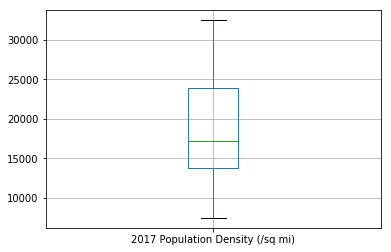

In [174]:
# We can also present the population density visually:
boxplot = chi_nearfinal.boxplot(column=['2017 Population Density (/sq mi)'])
boxplot

We can see the mean population density is 19,256 while min and max of our selected communities are 7,477 & 32,443 respectively with a standard deviation of 8,399. Our client has already determined through prior research and experience that higher than average population density is key to generating a vibrant atmosphere with ongoing foot traffic

We can now see from the table that two communities have population densities above 1 standard deviation (mean 19,256 + std 8,399 = 27,655): Near North Side and Edgewater. Uptown comes close being outside the 75% range but just under 1 std.